In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
customers = pd.read_csv('Customer.csv')
prod_info = pd.read_csv('prod_cat_info.csv')
transection = pd.read_csv('Transactions.csv')

# Exploratory data analysis

In [6]:
# Checking the shape of each dataset
print(f'customers data frame has {customers.shape[0]} rows and {customers.shape[1]} columns')
print()
print(f'prod_info data frame has {prod_info.shape[0]} rows and {prod_info.shape[1]} columns')
print()
print(f'transection data frame has {transection.shape[0]} rows and {transection.shape[1]} columns')

customers data frame has 5647 rows and 4 columns

prod_info data frame has 23 rows and 4 columns

transection data frame has 23053 rows and 10 columns


In [7]:
customers.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [8]:
prod_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [9]:
transection.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [11]:
# changing prod_sub_cat_code column name to prod_subcat_code in prod_info data frame
prod_info.rename(columns = {'prod_sub_cat_code':'prod_subcat_code'}, inplace = True)

In [12]:
transection.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


# 1. Mearge the datasets customers,  prod_info, transection as customer_final

## Mearging `transection` and `prod_info` as `prod_concat`

In [14]:
prod_concat = pd.merge(left = transection, right=prod_info, on = ['prod_cat_code', 'prod_subcat_code'], how = 'left')
prod_concat.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [15]:
# Checking for null values in prod_concate
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

#### *no null values found in prod_concat*

### Now meargning `customers` and `prod_concat`

In [19]:
customer_final = pd.merge(left = prod_concat, right = customers, right_on='customer_Id', left_on='cust_id', how = 'left')
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [21]:
# printing shape of the customer_final and customer data frame to check id there is loss in any row
print(f'Shape of the combined data frame is {customer_final.shape}')
print()
print(f'Shape of the original data frame is {transection.shape}')

Shape of the combined data frame is (23053, 16)

Shape of the original data frame is (23053, 10)


In [23]:
# checking the dtypes of the customer_final data frame
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

### `DOB` and `tran_date` are object data type we need to convert it into datatime dtype

In [27]:
# note Y in format
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format = "%d-%m-%Y")

In [29]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

In [31]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [24]:
# checking for null values in customer_final data frame
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

### No null values found in `customer_final`

## Checking for duplicate values in `customer_final`

In [33]:
customer_final.duplicated().sum()

13

In [34]:
# dropping duplicated rows
customer_final.drop_duplicates(inplace=True)

# 2. Preparing summary report for mearged data

## (a) Get the column names and their data types

In [35]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [36]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

## (b) Top and bottom 10 customers 

In [37]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [38]:
customer_final.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


## (c) Looking at 5 point summary

In [39]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


## (d) Frequency tables for categorical variables

In [47]:
customer_final.loc[:, customer_final.columns[customer_final.dtypes == 'object']].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


# 3. Generating histograms foe all contineous variables and frequency bars for categorical variables

## (a) producing histogram

In [51]:
continous_vars_df = customer_final.loc[:, ['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [52]:
continous_vars_df.head()

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,1,1,-5,-772,405.300,-4265.300
1,5,3,-5,-1497,785.925,-8270.925
2,6,5,-2,-791,166.110,-1748.110
3,11,6,-3,-1363,429.345,-4518.345
4,6,5,-2,-791,166.110,-1748.110


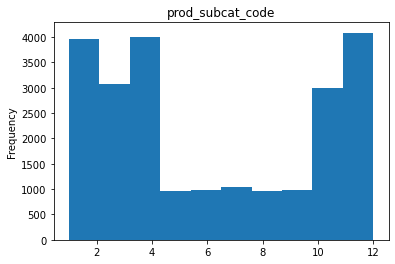

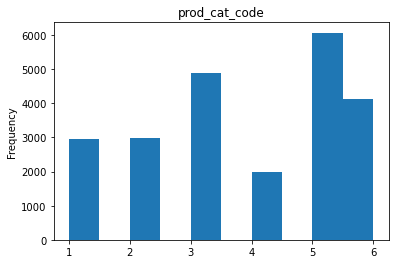

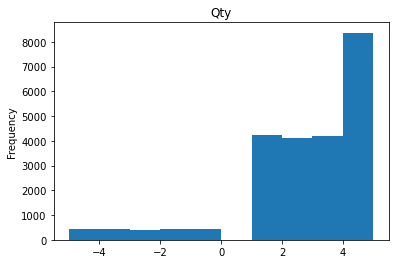

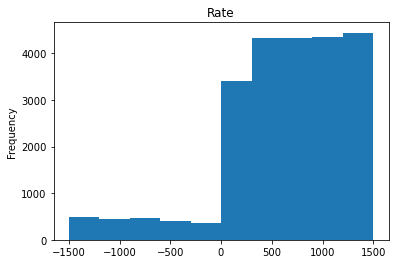

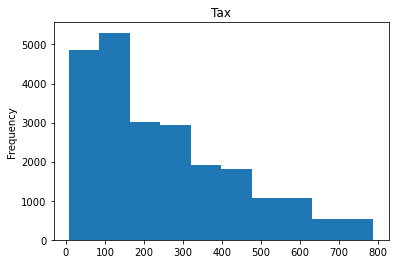

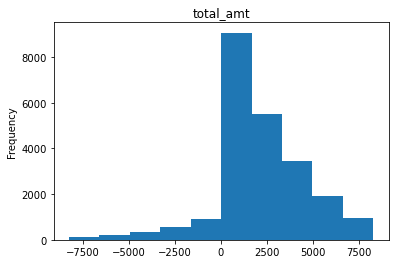

In [54]:
for var  in continous_vars_df.columns:
    continous_vars_df[var].plot(kind = 'hist')
    plt.title(var)
    plt.show()

## (b) producing bar charts

In [56]:
categorical_var_df = customer_final.loc[:, customer_final.dtypes == 'object']
categorical_var_df.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

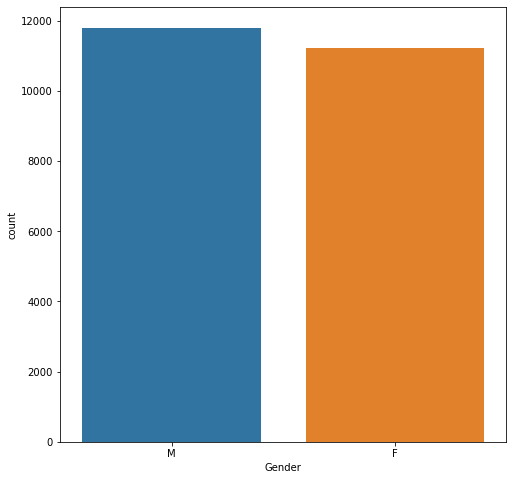

In [77]:
# ploting gender wise customers
plt.figure(figsize=(8, 8))
sns.countplot(categorical_var_df['Gender'])

#### There is almost equal numbers of male and female customers

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

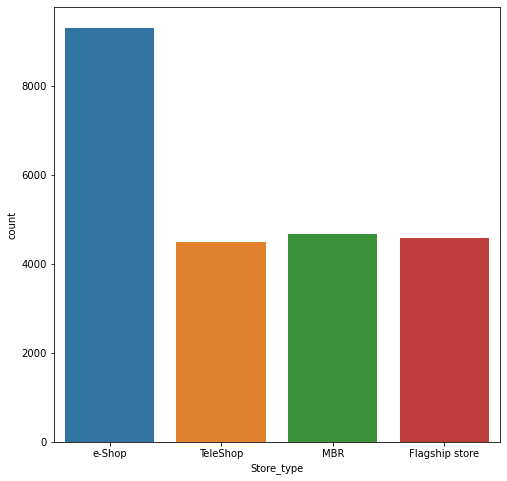

In [79]:
# Ploting store wise customers
plt.figure(figsize=(8, 8))
sns.countplot(categorical_var_df['Store_type'])

#### e-Shop store has significantly more numbers of customers as compared  to other stores

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='count'>

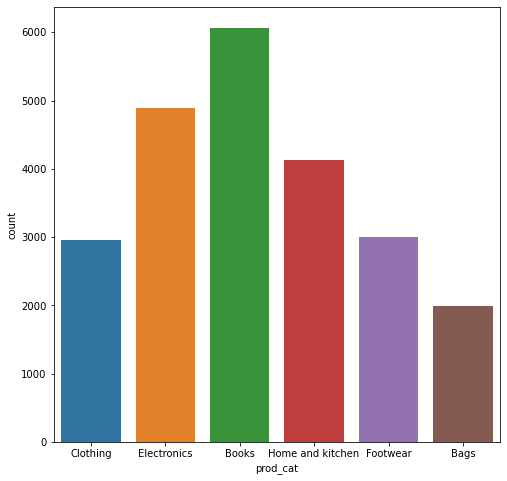

In [80]:
# Ploting categoru wise customers
plt.figure(figsize=(8, 8))
sns.countplot(categorical_var_df['prod_cat'])

#### Books category has largest numbers of cuatomers as comapred to others category

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


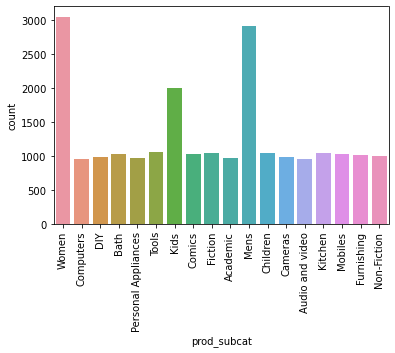

In [85]:
# ploting numbers of customers sub category wise
sns.countplot(categorical_var_df['prod_subcat'])
plt.xticks(rotation = 90);

# 4. Looking at few business problems

## (a) Time period of the transection data

In [93]:
max_date = customer_final.sort_values('tran_date')['tran_date'].iloc[-1]
print(max_date)
min_date = customer_final.sort_values('tran_date')['tran_date'].iloc[0]
print(min_date)
print(f'Time period available for the transection data is {max_date - min_date}')

2014-12-02 00:00:00
2011-01-02 00:00:00
Time period available for the transection data is 1430 days 00:00:00


## (b) Count of the transection where the total amount of tranction was negative

In [106]:
num_negative_transection = customer_final[customer_final['total_amt'] < 0]["transaction_id"].count()
print(f"There are {num_negative_transection} negative transaction")

There are 2164 negative transaction


## (c) Analyze which product categories are more popular among female vs male customers

In [114]:
product_cat_by_gender = customer_final.groupby(['Gender', 'prod_cat'])['Qty'].sum().reset_index()
product_cat_by_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [117]:
# creating pivot table of the product_cat_by_gender dataframe
product_cat_by_gender.pivot_table(index='Gender', columns='prod_cat', values = 'Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


#### Male and Female customers are buying more from Books, Electronics and home and kitchen category 


## (d) Which city has maximmum numbers of customers ans what is the percentage of customer from that city?

In [121]:
customers_by_city = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending = False)
customers_by_city

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

#### City with city code 4.0 has more numbers of customers

In [128]:
# finding the percentage of customers from city 4.0
percentage = customers_by_city.iloc[0] / customers_by_city.sum()
print(f'There are {round(percentage*100, 2)}% of customers from {4.0} city')

There are 10.52% of customers from 4.0 city


## (e) Which store type sells the maximum products by value and by quantity?

In [132]:
customer_final.groupby(['Store_type'])[['Rate', 'Qty']].sum().sort_values(by = 'Qty', ascending = False)

,Rate,Qty
Store_type,,
e-Shop,5945770,22790
MBR,2953665,11195
Flagship store,2942874,11142
TeleShop,2836359,10993


#### e-Shop type store sells maximum products by quantity and by amount

## (f) What was the total amount earned from the `Electronics` and  `Clothing` categories from `Flagship` Stores?

In [135]:
flag_ship_stores = customer_final[customer_final['Store_type'] == 'Flagship store']
flag_ship_stores.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
17,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,274829,1984-09-05,F,2.0
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,Footwear,Women,267466,1987-08-06,F,7.0
39,63407734630,271322,2014-02-19,3,2,5,1360,714.000,7514.000,Flagship store,Footwear,Women,271322,1979-11-27,F,7.0
41,82750983847,267544,2014-02-19,3,5,1,805,84.525,889.525,Flagship store,Books,Comics,267544,1984-10-12,M,7.0
42,67328698675,268755,2014-02-19,3,2,1,1018,106.890,1124.890,Flagship store,Footwear,Women,268755,1984-07-15,F,8.0


In [146]:
# sales by prod_cat by flagship stores
df = flag_ship_stores.groupby('prod_cat')['total_amt'].sum()
print(f"The amount earned by flagship store from electronics and cloting is {df['Electronics']} and {df['Clothing']} rupee")

The amount earned by flagship store from electronics and cloting is 2215136.04 and 1194423.23 rupee


## (g) What was the total amount earned from male customers under the electronics category

In [159]:
df = customer_final.groupby(['Gender', 'prod_cat'])['total_amt'].sum().reset_index()
value = pd.pivot_table(df, index = 'Gender', columns='prod_cat', values = 'total_amt').loc['M', 'Electronics']
print(f'{round(value, 2)} earned from male customes by selling electronics product')

5711351.62 earned from male customes by selling electronics product


## (h) How many customers have more than 10 unique transections, after removing all trnasections which have any negative amounts?

In [167]:
positive_transections = customer_final[customer_final['total_amt'] > 0]
unique_transaction = positive_transections.groupby(['customer_Id', 'prod_cat', 'prod_subcat'])['transaction_id'].count().reset_index()
unique_transaction.head()

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1


In [168]:
unique_transaction.groupby('customer_Id')['transaction_id'].count().reset_index()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [171]:
# transections with transection id more than 10
df = unique_transaction.groupby('customer_Id')['transaction_id'].count().reset_index()
df[df['transaction_id'] > 10]

,customer_Id,transaction_id


#### No customers with more than 10 unique transactions

## (i) For all customers between 35 - 45, find the following

### i - (1) What is the total amount spent for `Electronics` and `Books` product categories?

In [186]:
# Looking at current time and date
now = pd.Timestamp('now')
now.year

2022

In [190]:
pd.Timestamp('now')

Timestamp('2022-07-18 10:45:49.477386')

In [217]:
customer_final['year_of_birth'] = customer_final['DOB'].apply(lambda x: x.year)
customer_final['year_of_birth']

0        1981
1        1973
2        1992
3        1981
4        1992
         ... 
23048    1972
23049    1984
23050    1976
23051    1970
23052    1982
Name: year_of_birth, Length: 23040, dtype: int64

In [224]:
customer_final['age'] = pd.Timestamp('now').year - customer_final['year_of_birth'] 
customer_final['age'].head()

0    41
1    49
2    30
3    41
4    30
Name: age, dtype: int64

In [228]:
# Data frame with customers with age between 35 and 45
df = customer_final[(customer_final['age'] > 35) & (customer_final['age'] < 45)]


In [233]:
df.groupby(['prod_cat'])['total_amt'].sum().loc[['Books', 'Electronics']]

prod_cat
Books          4991613.185
Electronics    4119142.755
Name: total_amt, dtype: float64

### i - (2) What was total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014

In [242]:
# Sorting values based on tran_date
df = customer_final.sort_values(by = 'tran_date')
t = df[(df['tran_date'] > '2014-01-01') & (df['tran_date'] > '2014-03-01')]['total_amt']
print('totla amount spent by customers betwrrn 01-01-2014 and 01-03-2014 is \n', t.sum())

totla amount spent by customers betwrrn 01-01-2014 and 01-03-2014 is 
 826244.9650000001
